In [50]:
from google.colab import files

In [51]:
uploaded = files.upload()


Saving sample_submission.csv to sample_submission (1).csv


In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline

from subprocess import check_output
# print(check_output(''))

In [53]:
uploaded = files.upload()

Saving train.csv to train (1).csv


In [54]:
train = pd.read_csv(r'train.csv')
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [55]:
uploaded = files.upload()

Saving test.csv to test (1).csv


In [56]:
test = pd.read_csv(r'test.csv')
test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [57]:
train.info

<bound method DataFrame.info of         Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Ut

In [58]:
def getObjectFeature(df, col, datalength = 1460):
  if df[col].dtype!='object':
    print('feature', col, 'is not an object feature.')
    return df
  elif len([i for i in df[col].T.notnull() if i == True])!=datalength:
    print('feature', col, 'is missing data')
    return df
  else: 
    df1 = df
    counts = df1[col].value_counts()
    df1[col] = [counts.index.tolist().index(i) for i in df1[col]]
    return df1
fcntest = getObjectFeature(train, 'LotShape')
fcntest.head(10)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,0,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,0,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,0,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,0,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,0,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


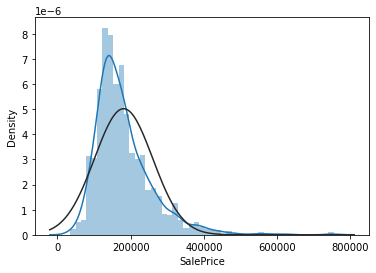

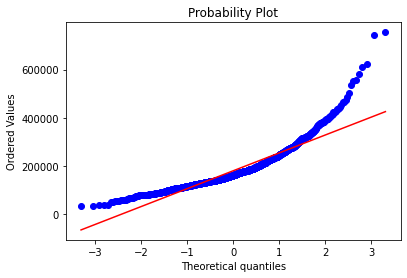

In [59]:
from scipy.stats import norm
sns.distplot(train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


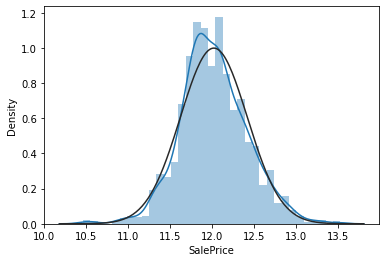

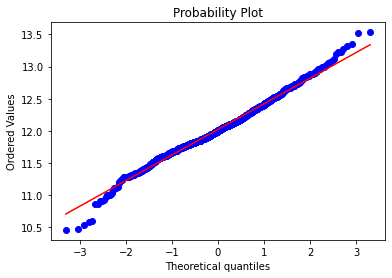

In [60]:
train['SalePrice'] = np.log(train['SalePrice'])
sns.distplot(train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot = plt)


In [61]:
from sklearn.tree import DecisionTreeRegressor as dtr
x = train[['MoSold', 'YrSold', 'LotArea', 'BedroomAbvGr']]
y = train[['SalePrice']]

x_test = test[['MoSold', 'YrSold', 'LotArea', 'BedroomAbvGr']]
print(x.head())
print(y.head())


   MoSold  YrSold  LotArea  BedroomAbvGr
0       2    2008     8450             3
1       5    2007     9600             3
2       9    2008    11250             3
3       2    2006     9550             3
4      12    2008    14260             4
   SalePrice
0  12.247694
1  12.109011
2  12.317167
3  11.849398
4  12.429216


**Target Variable Analysis: Is it normal?**



In [62]:
from sklearn.tree import DecisionTreeRegressor as DecisionTreeRegressor
x = train[['MoSold', 'YrSold', 'LotArea', 'BedroomAbvGr']]
y = train[['SalePrice']]

x_test = test[['MoSold', 'YrSold', 'LotArea', 'BedroomAbvGr']]
print(x.head())
print(y.head())


   MoSold  YrSold  LotArea  BedroomAbvGr
0       2    2008     8450             3
1       5    2007     9600             3
2       9    2008    11250             3
3       2    2006     9550             3
4      12    2008    14260             4
   SalePrice
0  12.247694
1  12.109011
2  12.317167
3  11.849398
4  12.429216


In [63]:
from sklearn.model_selection import cross_val_score

DTR_1 = dtr(max_depth=None)

scores_dtr = cross_val_score(DTR_1, x, y, cv=10, scoring='explained_variance')
print('score for k=10 fold validation: ', scores_dtr)
print("Est. explined variance: %0.2f (+/- %0.2f)" % (scores_dtr.mean(), scores_dtr.std() * 2))


score for k=10 fold validation:  [-0.38850263 -0.36746689 -0.35393116 -0.38915684 -0.17142622 -0.68776203
 -0.61805378 -0.67400304 -1.20864785 -0.38938699]
Est. explined variance: -0.52 (+/- 0.55)


**Random Forest for Trees**

In [64]:
from sklearn.ensemble import RandomForestRegressor as rfr
estimators = [2, 5, 10, 15, 20, 25, 30, 35, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80]
mean_rfrs = []
std_rfrs_upper = []
std_rfrs_lower = []
yt = [i for i in y['SalePrice']]

np.random.seed(11111)
for i in estimators:
  model = rfr(n_estimators = i, max_depth=None)
  scores_rfr = cross_val_score(model, x, yt, cv=10, scoring='explained_variance')
  print('estimators:', i)
  print("Est. explained variance: %0.2f (+/- %0.2f)" % (scores_rfr.mean(), scores_rfr.std() * 2))
  print('')
  mean_rfrs.append(scores_rfr.mean())
  std_rfrs_upper.append(scores_rfr.mean()+scores_rfr.std()*2)
  std_rfrs_lower.append(scores_rfr.mean()-scores_rfr.std()*2)



estimators: 2
Est. explained variance: -0.16 (+/- 0.23)

estimators: 5
Est. explained variance: 0.01 (+/- 0.26)

estimators: 10
Est. explained variance: 0.10 (+/- 0.20)

estimators: 15
Est. explained variance: 0.12 (+/- 0.21)

estimators: 20
Est. explained variance: 0.15 (+/- 0.16)

estimators: 25
Est. explained variance: 0.14 (+/- 0.19)

estimators: 30
Est. explained variance: 0.13 (+/- 0.21)

estimators: 35
Est. explained variance: 0.16 (+/- 0.17)

estimators: 35
Est. explained variance: 0.15 (+/- 0.19)

estimators: 40
Est. explained variance: 0.14 (+/- 0.19)

estimators: 45
Est. explained variance: 0.15 (+/- 0.15)

estimators: 50
Est. explained variance: 0.15 (+/- 0.20)

estimators: 55
Est. explained variance: 0.16 (+/- 0.20)

estimators: 60
Est. explained variance: 0.16 (+/- 0.15)

estimators: 65
Est. explained variance: 0.15 (+/- 0.17)

estimators: 70
Est. explained variance: 0.16 (+/- 0.19)

estimators: 75
Est. explained variance: 0.16 (+/- 0.19)

estimators: 80
Est. explained va

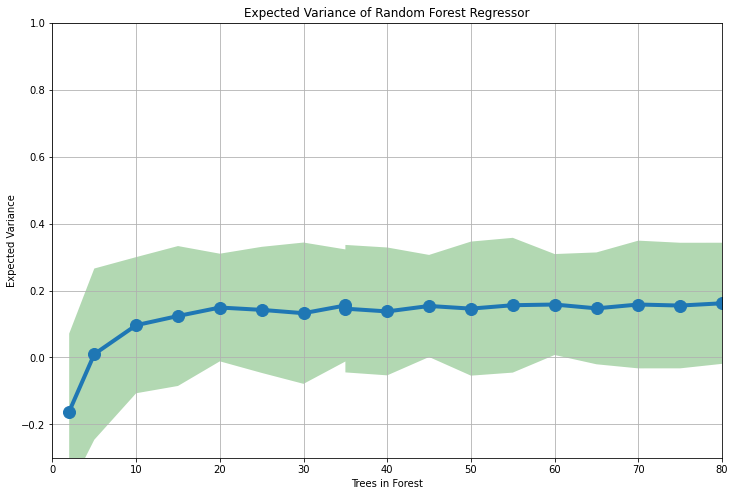

In [65]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)
ax.plot(estimators, mean_rfrs, marker='o', linewidth=4, markersize=12)
ax.fill_between(estimators, std_rfrs_lower, std_rfrs_upper, facecolor='green', alpha=0.3, interpolate=True)
ax.set_ylim([-.3, 1])
ax.set_xlim([0, 80])
plt.title('Expected Variance of Random Forest Regressor')
plt.ylabel('Expected Variance')
plt.xlabel('Trees in Forest')
plt.grid()
plt.show()


In [66]:
included_features = ['MoSold', 'YrSold', 'LotArea', 'BedroomAbvGr', 'FullBath', 'HalfBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd', 'LotShape', 'Utilities']

x = train[included_features]
y = train[['SalePrice']]

x_test = test[included_features]

for col in list(x):
  if x[col].dtype == 'object':
    x = getObjectFeature(x, col)
x.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


,MoSold,YrSold,LotArea,BedroomAbvGr,FullBath,HalfBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,LotShape,Utilities
0,2,2008,8450,3,2,1,8,2003,2003,0,0
1,5,2007,9600,3,2,0,6,1976,1976,0,0
2,9,2008,11250,3,2,1,6,2001,2002,1,0
3,2,2006,9550,3,1,0,7,1915,1970,1,0
4,12,2008,14260,4,2,1,9,2000,2000,1,0


In [67]:
# Define the number of estimators to consider

estimators = [2, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80]
mean_rfrs = []
std_rfrs_upper = []
std_rfrs_lower = []
yt = [i for i in y['SalePrice']]
np.random.seed(11111)

for i in estimators:
  model = rfr(n_estimators=i, max_depth=None)
  scores_rfr = cross_val_score(model, x, yt, cv=10, scoring='explained_variance')
  print('estimators:', i)

  print("Est. Explained variance: %0.2f (+/- %0.2f)" % (scores_rfr.mean(), scores_rfr.std() * 2))
  print(" ")
  mean_rfrs.append(scores_rfr.mean())
  std_rfrs_upper.append(scores_rfr.mean()+scores_rfr.std()*2)
  std_rfrs_lower.append(scores_rfr.mean()-scores_rfr.std()*2)


estimators: 2
Est. Explained variance: 0.58 (+/- 0.17)
 
estimators: 5
Est. Explained variance: 0.67 (+/- 0.09)
 
estimators: 10
Est. Explained variance: 0.69 (+/- 0.10)
 
estimators: 15
Est. Explained variance: 0.69 (+/- 0.09)
 
estimators: 20
Est. Explained variance: 0.70 (+/- 0.09)
 
estimators: 25
Est. Explained variance: 0.70 (+/- 0.10)
 
estimators: 30
Est. Explained variance: 0.71 (+/- 0.08)
 
estimators: 35
Est. Explained variance: 0.71 (+/- 0.09)
 
estimators: 40
Est. Explained variance: 0.71 (+/- 0.10)
 
estimators: 45
Est. Explained variance: 0.72 (+/- 0.08)
 
estimators: 50
Est. Explained variance: 0.71 (+/- 0.09)
 
estimators: 55
Est. Explained variance: 0.72 (+/- 0.09)
 
estimators: 60
Est. Explained variance: 0.72 (+/- 0.10)
 
estimators: 65
Est. Explained variance: 0.71 (+/- 0.08)
 
estimators: 70
Est. Explained variance: 0.71 (+/- 0.09)
 
estimators: 75
Est. Explained variance: 0.72 (+/- 0.09)
 
estimators: 80
Est. Explained variance: 0.72 (+/- 0.09)
 


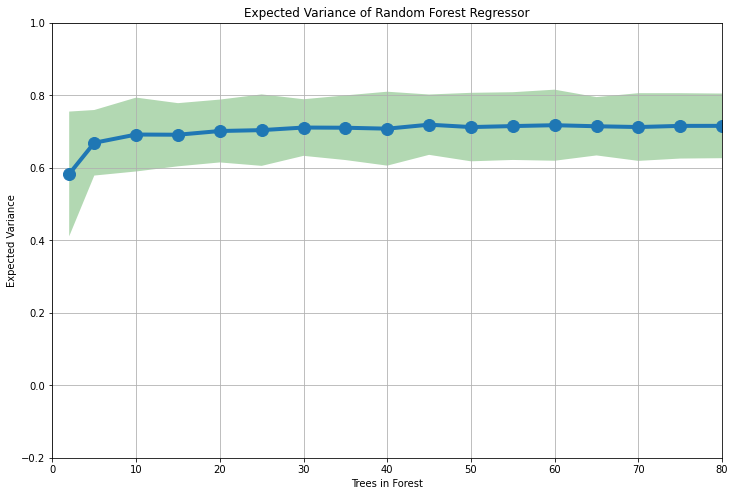

In [68]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)
ax.plot(estimators, mean_rfrs, marker='o', linewidth=4, markersize=12)
ax.fill_between(estimators, std_rfrs_lower, std_rfrs_upper, facecolor='green', alpha=0.3, interpolate=True)
ax.set_ylim([-.2, 1])
ax.set_xlim([0, 80])
plt.title('Expected Variance of Random Forest Regressor')
plt.ylabel('Expected Variance')
plt.xlabel('Trees in Forest')
plt.grid()
plt.show()


**Feature Analysis to Improve Random Forest Regressors**

In [69]:
import sklearn.feature_selection as fs

train = pd.read_csv(r'train.csv')
train['SalePrice'] = np.log(train['SalePrice'])

# included_features = [col for col in list(train) 
#                     if len([i for i in train[col].T.notnull() if i == True]) == 1460 
#                     and col! = 'SalePrice' and col!='id']

included_features = [col for col in list(train)
                    if len([i for i in train[col].T.notnull() if i == True])==1460
                    and col!='SalePrice' and col!='id']

x = train[included_features]
y = train[['SalePrice']]

yt = [i for i in y['SalePrice']]

x_test = test[included_features]

for col in list(x):
  if x[col].dtype == 'object':
    x = getObjectFeature(x, col)
x.head()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,0,8450,0,0,0,0,0,0,...,61,0,0,0,0,0,2,2008,0,0
1,2,20,0,9600,0,0,0,0,3,0,...,0,0,0,0,0,0,5,2007,0,0
2,3,60,0,11250,0,1,0,0,0,0,...,42,0,0,0,0,0,9,2008,0,0
3,4,70,0,9550,0,1,0,0,1,0,...,35,272,0,0,0,0,2,2006,0,2
4,5,60,0,14260,0,1,0,0,3,0,...,84,0,0,0,0,0,12,2008,0,0


**Mutual Information Regression Metric for Feature Ranking**

In [70]:
mir_result = fs.mutual_info_regression(x, yt)

feature_scores = []

for i in np.arange(len(included_features)):
  feature_scores.append([included_features[i], mir_result[i]])
sorted_scores = sorted(np.array(feature_scores), key=lambda s:
float(s[1]), reverse=True)
print(np.array(sorted_scores))


[['OverallQual' '0.5136381721742793']
 ['GrLivArea' '0.3703627611744371']
 ['GarageCars' '0.36306786180931905']
 ['KitchenQual' '0.3338163973982087']
 ['ExterQual' '0.3287640972504198']
 ['GarageArea' '0.2885644188969745']
 ['TotalBsmtSF' '0.2659845106806378']
 ['FullBath' '0.2622707877138404']
 ['1stFlrSF' '0.2619947306281647']
 ['YearBuilt' '0.2596084333686104']
 ['YearRemodAdd' '0.1960082277699473']
 ['Foundation' '0.19562658098485675']
 ['TotRmsAbvGrd' '0.1915020533249101']
 ['Fireplaces' '0.17031997732270887']
 ['HeatingQC' '0.16995592191050113']
 ['BsmtFinSF1' '0.13108811121442643']
 ['MSZoning' '0.12148616668761925']
 ['OverallCond' '0.11349373486797587']
 ['2ndFlrSF' '0.10867375088832265']
 ['LotShape' '0.0979153207264496']
 ['HalfBath' '0.08768083621946698']
 ['LotArea' '0.08751873685816003']
 ['SaleType' '0.07861772114711596']
 ['SaleCondition' '0.07460727173171389']
 ['BedroomAbvGr' '0.0676400172657381']
 ['CentralAir' '0.06392230608117333']
 ['MSSubClass' '0.062148659699976

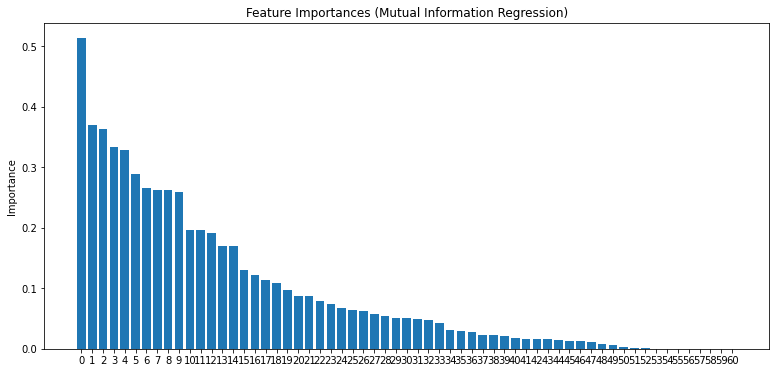

In [71]:
fig = plt.figure(figsize=(13, 6))
ax = fig.add_subplot(111)
ind = np.arange(len(included_features))
plt.bar(ind, [float(i) for i in np.array(sorted_scores)[:, 1]])
ax.axes.set_xticks(ind)
plt.title('Feature Importances (Mutual Information Regression)')
plt.ylabel('Importance')
plt.show()


**Feature Pruning**

In [72]:
def getModel(sorted_scores, train, numFeatures):
  included_features = np.array(sorted_scores)[:,0][:numFeatures]
  x = train[included_features]
  y = train[['SalePrice']]

  for col in list(x):
    if x[col].dtype == 'object':
      x = getObjectFeature(x, col)

  estimators = [2, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80]
  mean_rfrs = []
  std_rfrs_upper = []
  std_rfrs_lower = []
  yt = [i for i in y['SalePrice']]
  np.random.seed(11111)

  for i in estimators:
    model = rfr(n_estimators=i, max_depth=None)
    scores_rfr = cross_val_score(model, x, yt, cv=10, scoring='explained_variance')
    mean_rfrs.append(scores_rfr.mean())
    std_rfrs_upper.append(scores_rfr.mean()+scores_rfr.std()*2)
    std_rfrs_lower.append(scores_rfr.mean()-scores_rfr.std()*2)
  return mean_rfrs, std_rfrs_upper, std_rfrs_lower

def plotResults(mean_rfrs, std_rfrs_upper, std_rfrs_lower, numFeatures):
  fig = plt.figure(figsize=(12, 8))
  ax = fig.add_subplot(111)
  ax.plot(estimators, mean_rfrs, marker='o', linewidth=4, markersize=12)
  ax.fill_between(estimators, std_rfrs_lower, std_rfrs_upper, facecolor='green', alpha=0.3, interpolate=True)
  ax.set_ylim([-.2, 1])
  ax.set_xlim([0, 80])
  plt.title('Expected Variance of Random Forest Regressor: Top %d Features' %numFeatures)
  plt.ylabel('Expected Variance')
  plt.xlabel('Tree in Forest')
  plt.grid()
  plt.show()
  return


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


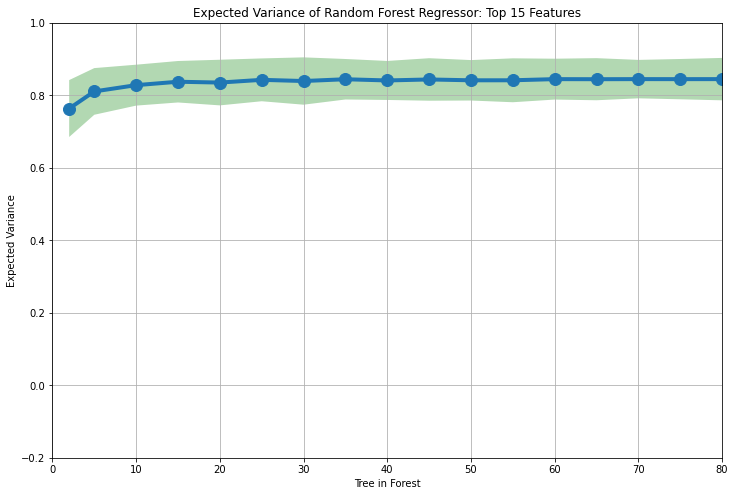

In [73]:
mean_rfrs, std_rfrs_upper, std_rfrs_lower = getModel(sorted_scores, train, 15)
plotResults(mean_rfrs, std_rfrs_upper, std_rfrs_lower, 15)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


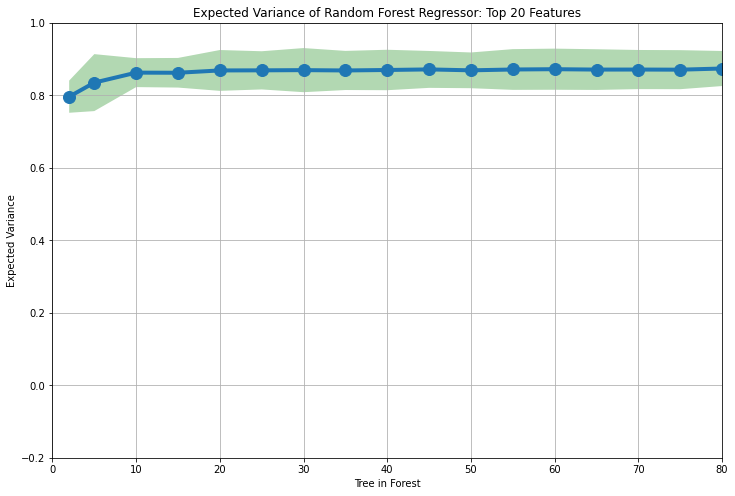

In [74]:
mean_rfrs, std_rfrs_upper, std_rfrs_lower = getModel(sorted_scores, train, 20)
plotResults(mean_rfrs, std_rfrs_upper, std_rfrs_lower, 20)


In [75]:
#To build the model with the desirable parameters
numFeatures = 40
trees = 60
included_features = np.array(sorted_scores)[:, 0] [:numFeatures]

x = train[included_features]
y = [['SalePrice']]

# for col in list(x):
#   if x[col].dtype == 'object':
#     x = getObjectFeature(x, col)
# yt = [i for i in y['SalePrice']]
# np.random.seed(11111)
# model = rfr(n_estimators = trees, max_depth=None)
# scores_rfr = cross_val_score(model, x, yt, cv=10, scoring='explained_variance')
# print("Est. explained variance: %0.2f (+/- %0.2f)" % (scores_rfr.mean(), scores_rfr.std() * 2))
# model.fit(x, yt)


for col in list(x):
    if x[col].dtype=='object':
        x = getObjectFeature(x, col)
yt = [i for i in Y['SalePrice']]
# result = yt[int(y)]
np.random.seed(11111)
model = rfr(n_estimators=trees,max_depth=None)
scores_rfr = cross_val_score(model,x,yt,cv=10,scoring='explained_variance')
print('explained variance scores for k=10 fold validation:',scores_rfr)
print("Est. explained variance: %0.2f (+/- %0.2f)" % (scores_rfr.mean(), scores_rfr.std() * 2))
# fit the model
model.fit(x,yt)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


explained variance scores for k=10 fold validation: [0.84695781 0.89746771 0.89731643 0.8444001  0.86607408 0.90150856
 0.8874428  0.89999813 0.84855316 0.86060301]
Est. explained variance: 0.88 (+/- 0.05)


RandomForestRegressor(n_estimators=60)

In [76]:
# build the model with the desired parameters...
numFeatures = 40 # the number of features to inlcude
trees = 60 # trees in the forest
included_features = np.array(sorted_scores)[:,0][:numFeatures]
# define the training data X...
X = train[included_features]
Y = train[['SalePrice']]
# transform categorical data if included in X...
for col in list(x):
    if x[col].dtype=='object':
        x = getObjectFeature(x, col)
yt = [i for i in Y['SalePrice']]
np.random.seed(11111)
model = rfr(n_estimators=trees,max_depth=None)
scores_rfr = cross_val_score(model,x,yt,cv=10,scoring='explained_variance')
print('explained variance scores for k=10 fold validation:',scores_rfr)
print("Est. explained variance: %0.2f (+/- %0.2f)" % (scores_rfr.mean(), scores_rfr.std() * 2))
# fit the model
model.fit(x,yt)

explained variance scores for k=10 fold validation: [0.84695781 0.89746771 0.89731643 0.8444001  0.86607408 0.90150856
 0.8874428  0.89999813 0.84855316 0.86060301]
Est. explained variance: 0.88 (+/- 0.05)


RandomForestRegressor(n_estimators=60)

In [77]:
test = pd.read_csv(r'test.csv')


In [78]:
def getObjectFeature(df, col, datalength=1460):
  if df[col].dtype!='object':
    print('feature', col, 'is not an object feature.')
    return df
  else:
    df1 = df
    counts = df1[col].value_counts()

    df1[col] = [counts.index.tolist().index(i)
                if i in counts.index.tolist()
                else 0
                for i in df1[col] ]
    return df1


In [80]:
x_test = test[included_features]
for col in list(x_test):
  if x_test[col].dtype=='object':
    x_test = getObjectFeature(x_test, col, datalength=1460)

y_output = model.predict(x_test.fillna(0))
print(y_output)


[11.77143109 11.94109789 12.08597025 ... 11.97226905 11.65568481
 12.35762795]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [81]:
y_output = np.exp(y_output)
print(y_output)


[129499.34330374 153445.06428634 177365.92566496 ... 158303.45088993
 115345.21860237 232728.53013525]


In [82]:
saleprice = pd.DataFrame(y_output, columns=['SalePrice'])

results = pd.concat([test['Id'], saleprice['SalePrice']], axis=1)
results.head()


,Id,SalePrice
0,1461,129499.343304
1,1462,153445.064286
2,1463,177365.925665
3,1464,182690.274575
4,1465,193522.853820


In [87]:
results.to_csv(r'housepricing_submission.csv', index=False)